In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.8 MB/s eta 0:00:00


In [ ]:
!pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43310 sha256=1f92f3e312eb4957026bdf68f9d9486d8c4c7eaef749f6ef26589326df69ae02
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex


In [ ]:
!pip install wordcloud nltk

In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
song_data = pd.read_csv('/content/drive/MyDrive/DL NLP Data/spotify_millsongdata.csv')
song_data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
df = song_data.sample(n=5991)
df.artist.value_counts()

Alabama             27
Reba Mcentire       27
Elton John          26
Michael W. Smith    26
Dean Martin         24
                    ..
Walk The Moon        1
Raffi                1
Xentrix              1
Yeng Constantino     1
Side A               1
Name: artist, Length: 611, dtype: int64

In [ ]:
df

,artist,song,link,text
42770,Marianne Faithfull,Go Away From My World,/m/marianne+faithfull/go+away+from+my+world_20...,"Go away from my world, \r\nLet me dream alone..."
54232,Ufo,Black Cold Coffee,/u/ufo/black+cold+coffee_20154407.html,Captain midnight and Captain cruise \r\nOut o...
43524,Metallica,Dream No More,/m/metallica/dream+no+more_21111991.html,He sleeps under black seas waiting \r\nLies d...
30366,Doors,The Changeling,/d/doors/the+changeling_20042703.html,Uh! \r\nUha! \r\nGedu! \r\n \r\nI live upt...
39745,Kelly Clarkson,What Happened Here,/k/kelly+clarkson/what+happened+here_20978117....,Nothing's changed here \r\nIt's like you neve...
...,...,...,...,...
40646,Kiss,Hard Luck Woman,/k/kiss/hard+luck+woman_20079945.html,If never I met you \r\nI'd never have seen yo...
17356,Red Hot Chili Peppers,Punk Rock Classic,/r/red+hot+chili+peppers/punk+rock+classic_201...,I'm a radio Joe of the biz called show \r\nI'...
33914,George Strait,King Of The Mountain,/g/george+strait/king+of+the+mountain_20059417...,"I gave her that diamond she dreamed of, \r\nA..."
43307,Matt Redman,Mission's Flame,/m/matt+redman/missions+flame_20612943.html,Verse 1 \r\nLet worship be the fuel for missi...


In [ ]:
song_data = df
song_data.head()

,artist,song,link,text
42770,Marianne Faithfull,Go Away From My World,/m/marianne+faithfull/go+away+from+my+world_20...,"Go away from my world, \r\nLet me dream alone..."
54232,Ufo,Black Cold Coffee,/u/ufo/black+cold+coffee_20154407.html,Captain midnight and Captain cruise \r\nOut o...
43524,Metallica,Dream No More,/m/metallica/dream+no+more_21111991.html,He sleeps under black seas waiting \r\nLies d...
30366,Doors,The Changeling,/d/doors/the+changeling_20042703.html,Uh! \r\nUha! \r\nGedu! \r\n \r\nI live upt...
39745,Kelly Clarkson,What Happened Here,/k/kelly+clarkson/what+happened+here_20978117....,Nothing's changed here \r\nIt's like you neve...


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Tokenization, Stop Words Removal, Stemming, Lemmatization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic characters
    tokens = [word.lower() for word in tokens]  # Convert to lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

song_data['text'] = song_data['text'].astype(str)
song_data['ProcessedLyrics'] = song_data['text'].apply(preprocess_text)

# Artist Wordcloud
# Plot a word cloud for artist song counts


# Continue with the rest of your code for analysis and visualization.


In [ ]:
song_data.head()

,artist,song,link,text,ProcessedLyrics
42770,Marianne Faithfull,Go Away From My World,/m/marianne+faithfull/go+away+from+my+world_20...,"Go away from my world, \r\nLet me dream alone...",go away world let dream alon see never work st...
54232,Ufo,Black Cold Coffee,/u/ufo/black+cold+coffee_20154407.html,Captain midnight and Captain cruise \r\nOut o...,captain midnight captain cruis ocean like stor...
43524,Metallica,Dream No More,/m/metallica/dream+no+more_21111991.html,He sleeps under black seas waiting \r\nLies d...,sleep black sea wait lie dream death sleep cos...
30366,Doors,The Changeling,/d/doors/the+changeling_20042703.html,Uh! \r\nUha! \r\nGedu! \r\n \r\nI live upt...,uh uha gedu live uptown live downtown live aro...
39745,Kelly Clarkson,What Happened Here,/k/kelly+clarkson/what+happened+here_20978117....,Nothing's changed here \r\nIt's like you neve...,noth chang like never left kept everyth even l...


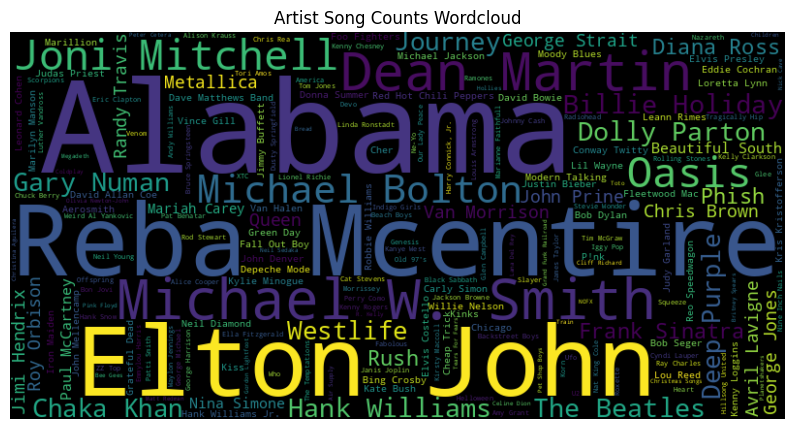

In [ ]:
artist_counts = song_data['artist'].value_counts()
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='black').generate_from_frequencies(artist_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Artist Song Counts Wordcloud")
plt.show()

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Define a function to tokenize lyrics using BERT tokenizer
def tokenize_lyrics(text):
    tokens = tokenizer.tokenize(text)
    return tokens

# Apply the tokenization to the lyrics
song_data['text'] = song_data['text'].apply(tokenize_lyrics)

In [ ]:
song_data.head()

,artist,song,link,text,ProcessedLyrics
42770,Marianne Faithfull,Go Away From My World,/m/marianne+faithfull/go+away+from+my+world_20...,"[go, away, from, my, world, ,, let, me, dream,...",go away world let dream alon see never work st...
54232,Ufo,Black Cold Coffee,/u/ufo/black+cold+coffee_20154407.html,"[captain, midnight, and, captain, cruise, out,...",captain midnight captain cruis ocean like stor...
43524,Metallica,Dream No More,/m/metallica/dream+no+more_21111991.html,"[he, sleeps, under, black, seas, waiting, lies...",sleep black sea wait lie dream death sleep cos...
30366,Doors,The Changeling,/d/doors/the+changeling_20042703.html,"[uh, !, uh, ##a, !, ge, ##du, !, i, live, upto...",uh uha gedu live uptown live downtown live aro...
39745,Kelly Clarkson,What Happened Here,/k/kelly+clarkson/what+happened+here_20978117....,"[nothing, ', s, changed, here, it, ', s, like,...",noth chang like never left kept everyth even l...


In [ ]:
song_data['WordCount'] = song_data['ProcessedLyrics'].apply(len)

# Plot songs with the most and least words
top_songs = song_data.nlargest(10, 'WordCount')
bottom_songs = song_data.nsmallest(10, 'WordCount')

In [ ]:
song_data.head()

,artist,song,link,text,ProcessedLyrics,WordCount
42770,Marianne Faithfull,Go Away From My World,/m/marianne+faithfull/go+away+from+my+world_20...,"[go, away, from, my, world, ,, let, me, dream,...",go away world let dream alon see never work st...,294
54232,Ufo,Black Cold Coffee,/u/ufo/black+cold+coffee_20154407.html,"[captain, midnight, and, captain, cruise, out,...",captain midnight captain cruis ocean like stor...,534
43524,Metallica,Dream No More,/m/metallica/dream+no+more_21111991.html,"[he, sleeps, under, black, seas, waiting, lies...",sleep black sea wait lie dream death sleep cos...,576
30366,Doors,The Changeling,/d/doors/the+changeling_20042703.html,"[uh, !, uh, ##a, !, ge, ##du, !, i, live, upto...",uh uha gedu live uptown live downtown live aro...,542
39745,Kelly Clarkson,What Happened Here,/k/kelly+clarkson/what+happened+here_20978117....,"[nothing, ', s, changed, here, it, ', s, like,...",noth chang like never left kept everyth even l...,783


In [ ]:
from nrclex import NRCLex

song_data['Sentiment'] = song_data['ProcessedLyrics'].apply(lambda x: NRCLex(x))
song_data['SentimentCounts'] = song_data['Sentiment'].apply(lambda x: x.affect_frequencies)
song_data.head()

,artist,song,link,text,ProcessedLyrics,WordCount,Sentiment,SentimentCounts
42770,Marianne Faithfull,Go Away From My World,/m/marianne+faithfull/go+away+from+my+world_20...,"[go, away, from, my, world, ,, let, me, dream,...",go away world let dream alon see never work st...,294,<nrclex.NRCLex object at 0x7aa31a0518a0>,"{'fear': 0.07692307692307693, 'anger': 0.07692..."
54232,Ufo,Black Cold Coffee,/u/ufo/black+cold+coffee_20154407.html,"[captain, midnight, and, captain, cruise, out,...",captain midnight captain cruis ocean like stor...,534,<nrclex.NRCLex object at 0x7aa33a108700>,"{'fear': 0.07692307692307693, 'anger': 0.07692..."
43524,Metallica,Dream No More,/m/metallica/dream+no+more_21111991.html,"[he, sleeps, under, black, seas, waiting, lies...",sleep black sea wait lie dream death sleep cos...,576,<nrclex.NRCLex object at 0x7aa31a050340>,"{'fear': 0.12631578947368421, 'anger': 0.17894..."
30366,Doors,The Changeling,/d/doors/the+changeling_20042703.html,"[uh, !, uh, ##a, !, ge, ##du, !, i, live, upto...",uh uha gedu live uptown live downtown live aro...,542,<nrclex.NRCLex object at 0x7aa31003fee0>,"{'fear': 0.04, 'anger': 0.12, 'anticip': 0.0, ..."
39745,Kelly Clarkson,What Happened Here,/k/kelly+clarkson/what+happened+here_20978117....,"[nothing, ', s, changed, here, it, ', s, like,...",noth chang like never left kept everyth even l...,783,<nrclex.NRCLex object at 0x7aa31003dab0>,"{'fear': 0.02702702702702703, 'anger': 0.02702..."


In [ ]:
sentiment_categories = song_data['SentimentCounts'].iloc[0].keys()
sentiment_categories

dict_keys(['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'anticipation'])

In [ ]:
unique_words = set(word for lyrics in song_data['text'] for word in lyrics)
# song_data['Word'] = unique_words
len(unique_words)

16325

In [ ]:
def get_unique_words(lyrics):
    unique_words = set(lyrics)
    return ' '.join(unique_words)

# Apply the function to create a new column 'UniqueWords' in the dataset
song_data['Words'] = song_data['text'].apply(get_unique_words)
song_data = song_data.drop(['UniqueWords'], 1)

<ipython-input-66-01b77594c600>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  song_data = song_data.drop(['UniqueWords'], 1)


In [ ]:
song_data.head()

,artist,song,link,text,ProcessedLyrics,WordCount,Sentiment,SentimentCounts,Words
42770,Marianne Faithfull,Go Away From My World,/m/marianne+faithfull/go+away+from+my+world_20...,"[go, away, from, my, world, ,, let, me, dream,...",go away world let dream alon see never work st...,294,<nrclex.NRCLex object at 0x7aa31a0518a0>,"{'fear': 0.07692307692307693, 'anger': 0.07692...",from broken got walk there in never all now al...
54232,Ufo,Black Cold Coffee,/u/ufo/black+cold+coffee_20154407.html,"[captain, midnight, and, captain, cruise, out,...",captain midnight captain cruis ocean like stor...,534,<nrclex.NRCLex object at 0x7aa33a108700>,"{'fear': 0.07692307692307693, 'anger': 0.07692...","bad ringing paper mac storm plan it sack ##s ,..."
43524,Metallica,Dream No More,/m/metallica/dream+no+more_21111991.html,"[he, sleeps, under, black, seas, waiting, lies...",sleep black sea wait lie dream death sleep cos...,576,<nrclex.NRCLex object at 0x7aa31a050340>,"{'fear': 0.12631578947368421, 'anger': 0.17894...",pure granting soul stars ##haling damn skies i...
30366,Doors,The Changeling,/d/doors/the+changeling_20042703.html,"[uh, !, uh, ##a, !, ge, ##du, !, i, live, upto...",uh uha gedu live uptown live downtown live aro...,542,<nrclex.NRCLex object at 0x7aa31003fee0>,"{'fear': 0.04, 'anger': 0.12, 'anticip': 0.0, ...",yeah had in ##vin been downtown all never eat ...
39745,Kelly Clarkson,What Happened Here,/k/kelly+clarkson/what+happened+here_20978117....,"[nothing, ', s, changed, here, it, ', s, like,...",noth chang like never left kept everyth even l...,783,<nrclex.NRCLex object at 0x7aa31003dab0>,"{'fear': 0.02702702702702703, 'anger': 0.02702...",yeah hall same know ? head did hard leave it w...


In [ ]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

In [ ]:
song_data['Sentiment'] = song_data['ProcessedLyrics'].apply(get_sentiment)

In [ ]:
positive_words = ' '.join(song_data[song_data['Sentiment'] == 'positive']['ProcessedLyrics'])
negative_words = ' '.join(song_data[song_data['Sentiment'] == 'negative']['ProcessedLyrics'])

# Create word clouds for positive and negative words
wordcloud_positive = WordCloud(width=800, height=400, background_color='black').generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_words)

Text(0.5, 1.0, 'Positive Wordcloud')

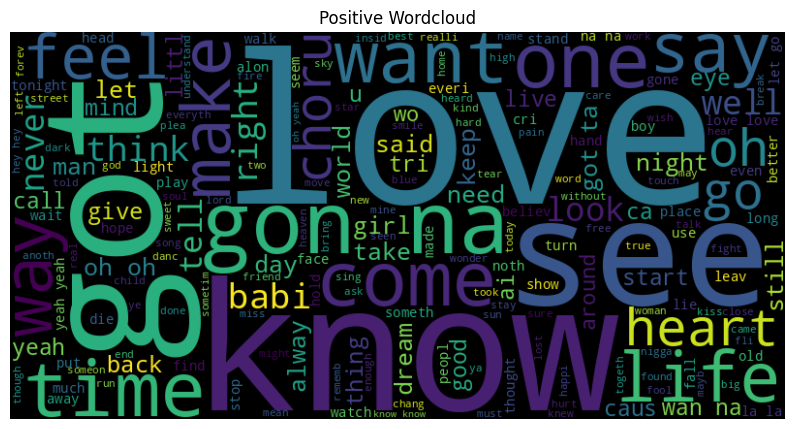

In [ ]:
plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Wordcloud")

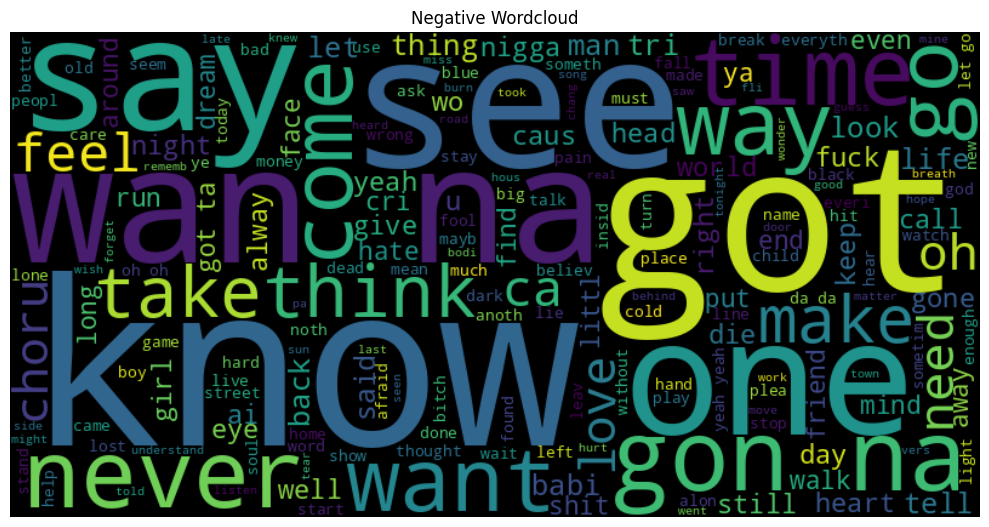

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Wordcloud")

plt.tight_layout()
plt.show()

In [ ]:
song_data.head()

,artist,song,link,text,ProcessedLyrics,WordCount,Sentiment,SentimentCounts,Words
42770,Marianne Faithfull,Go Away From My World,/m/marianne+faithfull/go+away+from+my+world_20...,"[go, away, from, my, world, ,, let, me, dream,...",go away world let dream alon see never work st...,294,positive,"{'fear': 0.07692307692307693, 'anger': 0.07692...",from broken got walk there in never all now al...
54232,Ufo,Black Cold Coffee,/u/ufo/black+cold+coffee_20154407.html,"[captain, midnight, and, captain, cruise, out,...",captain midnight captain cruis ocean like stor...,534,negative,"{'fear': 0.07692307692307693, 'anger': 0.07692...","bad ringing paper mac storm plan it sack ##s ,..."
43524,Metallica,Dream No More,/m/metallica/dream+no+more_21111991.html,"[he, sleeps, under, black, seas, waiting, lies...",sleep black sea wait lie dream death sleep cos...,576,negative,"{'fear': 0.12631578947368421, 'anger': 0.17894...",pure granting soul stars ##haling damn skies i...
30366,Doors,The Changeling,/d/doors/the+changeling_20042703.html,"[uh, !, uh, ##a, !, ge, ##du, !, i, live, upto...",uh uha gedu live uptown live downtown live aro...,542,positive,"{'fear': 0.04, 'anger': 0.12, 'anticip': 0.0, ...",yeah had in ##vin been downtown all never eat ...
39745,Kelly Clarkson,What Happened Here,/k/kelly+clarkson/what+happened+here_20978117....,"[nothing, ', s, changed, here, it, ', s, like,...",noth chang like never left kept everyth even l...,783,positive,"{'fear': 0.02702702702702703, 'anger': 0.02702...",yeah hall same know ? head did hard leave it w...


In [ ]:
song_data.to_csv('/content/drive/MyDrive/DL NLP Data/lyrics.csv')